# Menguji Model Dengan Data Uji
## Evaluasi & Validasi Hasil

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [38]:
df_uji=pd.read_csv('./datasetpenjualan/data_uji.csv')
df_uji


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,2,44,2012-07-06,5263.12,False,84.20,3.227,12355.50,295.05,100.15,6720.40,5506.53,221.521506,6.565,A,202307
1,24,34,2010-09-24,15102.00,False,64.30,2.837,0.00,0.00,0.00,0.00,0.00,132.761933,8.117,A,203819
2,26,12,2011-01-14,2844.68,False,16.70,3.215,0.00,0.00,0.00,0.00,0.00,132.951065,7.907,A,152513
3,13,23,2010-12-10,43395.78,False,36.78,2.817,0.00,0.00,0.00,0.00,0.00,126.793400,7.795,A,219622
4,39,58,2011-11-25,2880.00,True,66.36,3.236,224.08,292.94,77126.16,77.74,4875.43,217.181253,7.716,A,184109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125591,27,31,2010-08-27,9074.32,False,70.31,2.885,0.00,0.00,0.00,0.00,0.00,136.557015,7.982,A,204184
125592,39,72,2011-10-14,40114.98,False,73.79,3.274,0.00,0.00,0.00,0.00,0.00,216.088526,7.716,A,184109
125593,14,34,2012-03-09,21377.88,False,45.52,3.848,15710.87,1050.48,1.49,2302.28,2702.96,190.335997,8.424,A,200898
125594,15,98,2011-01-07,53.25,False,30.53,3.351,0.00,0.00,0.00,0.00,0.00,132.882323,7.771,B,123737


In [39]:
# Konversi bentuk data date
df_uji['Date'] = pd.to_datetime(df_uji['Date'])  # Pastikan kolom 'Date' dalam format datetime
df_uji['week'] = df_uji['Date'].dt.isocalendar().week
df_uji['month'] = df_uji['Date'].dt.month
df_uji['year'] = df_uji['Date'].dt.year

# Menghapus kolom 'Date' dari dataframe
df_uji = df_uji.drop('Date', axis=1)

from sklearn.preprocessing import LabelEncoder
# Cek nilai unik sebelum encoding
print(f'Sebelum encoding: {df_uji["Type"].unique()}')
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
# Terapkan LabelEncoder dan simpan hasilnya langsung ke kolom 'loan_intent'
df_uji['Type'] = label_encoder.fit_transform(df_uji['Type'])
# Cek hasil encoding
print(f'Setelah encoding: {df_uji["Type"].unique()}')
# Tampilkan DataFrame baru
print(df_uji[['Type']].head())

Sebelum encoding: ['A' 'B' 'C']
Setelah encoding: [0 1 2]
   Type
0     0
1     0
2     0
3     0
4     0


In [40]:
print(df_uji.info())
df_uji.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125596 entries, 0 to 125595
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         125596 non-null  int64  
 1   Dept          125596 non-null  int64  
 2   Weekly_Sales  125596 non-null  float64
 3   IsHoliday     125596 non-null  bool   
 4   Temperature   125596 non-null  float64
 5   Fuel_Price    125596 non-null  float64
 6   MarkDown1     125596 non-null  float64
 7   MarkDown2     125596 non-null  float64
 8   MarkDown3     125596 non-null  float64
 9   MarkDown4     125596 non-null  float64
 10  MarkDown5     125596 non-null  float64
 11  CPI           125596 non-null  float64
 12  Unemployment  125596 non-null  float64
 13  Type          125596 non-null  int64  
 14  Size          125596 non-null  int64  
 15  week          125596 non-null  UInt32 
 16  month         125596 non-null  int32  
 17  year          125596 non-null  int32  
dtypes: U

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
count,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.00,125596.0,125596.00,125596.00
mean,22.19,44.31,16063.48,60.06,3.36,2580.79,893.07,490.05,1086.94,1670.61,171.23,7.96,0.69,136701.49,25.79,6.44,2010.97
std,12.79,30.51,22660.46,18.43,0.46,6114.65,5172.90,5658.55,3944.10,4332.09,39.16,1.86,0.75,61041.67,14.16,3.24,0.80
min,1.00,1.00,0.01,-2.06,2.47,0.00,0.00,0.00,0.00,0.00,126.06,3.88,0.00,34875.00,1.0,1.00,2010.00
25%,11.00,18.00,2099.56,46.65,2.94,0.00,0.00,0.00,0.00,0.00,132.06,6.89,0.00,93638.00,14.0,4.00,2010.00
50%,22.00,38.00,7665.28,62.08,3.45,0.00,0.00,0.00,0.00,0.00,182.32,7.87,1.00,140167.00,26.0,6.00,2011.00
75%,33.00,74.00,20334.85,74.26,3.74,2776.24,3.12,4.49,420.22,2152.23,212.46,8.57,1.00,202505.00,38.0,9.00,2012.00
max,45.00,99.00,393705.20,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31,2.00,219622.00,52.0,12.00,2012.00


# Memuat model tanpa feature selection

In [41]:
print("Data Uji:")
print(df_uji.head())

Data Uji:
   Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      2    44       5263.12      False        84.20       3.227   12355.50   
1     24    34      15102.00      False        64.30       2.837       0.00   
2     26    12       2844.68      False        16.70       3.215       0.00   
3     13    23      43395.78      False        36.78       2.817       0.00   
4     39    58       2880.00       True        66.36       3.236     224.08   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  Type  \
0     295.05     100.15    6720.40    5506.53  221.521506         6.565     0   
1       0.00       0.00       0.00       0.00  132.761933         8.117     0   
2       0.00       0.00       0.00       0.00  132.951065         7.907     0   
3       0.00       0.00       0.00       0.00  126.793400         7.795     0   
4     292.94   77126.16      77.74    4875.43  217.181253         7.716     0   

     Size  week  month  year

In [42]:
print(df_uji.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125596 entries, 0 to 125595
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         125596 non-null  int64  
 1   Dept          125596 non-null  int64  
 2   Weekly_Sales  125596 non-null  float64
 3   IsHoliday     125596 non-null  bool   
 4   Temperature   125596 non-null  float64
 5   Fuel_Price    125596 non-null  float64
 6   MarkDown1     125596 non-null  float64
 7   MarkDown2     125596 non-null  float64
 8   MarkDown3     125596 non-null  float64
 9   MarkDown4     125596 non-null  float64
 10  MarkDown5     125596 non-null  float64
 11  CPI           125596 non-null  float64
 12  Unemployment  125596 non-null  float64
 13  Type          125596 non-null  int64  
 14  Size          125596 non-null  int64  
 15  week          125596 non-null  UInt32 
 16  month         125596 non-null  int32  
 17  year          125596 non-null  int32  
dtypes: U

In [43]:
# Pisahkan fitur (X_uji) dan target (y_uji) 
X_uji = df_uji.drop('Weekly_Sales', axis=1)
y_uji = df_uji['Weekly_Sales']


In [44]:
# Tampilkan hasil
print("Shape X_uji:", X_uji.shape)
print("Shape y_uji:", y_uji.shape)


Shape X_uji: (125596, 17)
Shape y_uji: (125596,)


# Evaluasi Model Dtree

In [45]:
import joblib
# Memuat kembali model dtree tanpa feature selection dari file 'dtree_model.joblib'
model = joblib.load('./modelmachine/model_dtree.joblib')
model


DecisionTreeRegressor()

In [46]:
import joblib
# Memuat kembali model dtree dengan feature selection dari file 'dtree_model.joblib'
model1 = joblib.load('./modelmachine/model2.joblib')
model1


DecisionTreeRegressor(criterion='friedman_mse', max_depth=30,
                      min_samples_split=5)

In [47]:
# evaluasi dengan model tanpa feature selection
y_pred_uji = model.predict(X_uji)

In [48]:
y_pred_uji

array([ 6453.86, 17535.  ,  2021.23, ..., 31085.34,    39.  ,  3776.75],
      shape=(125596,))

### 1. EVALUASI MODEL MESIN LEARNING-1 (TANPA FEATURE SELECTION)

In [49]:
y_pred1_uji = model.predict(X_uji)

In [50]:
print(y_uji.shape, y_pred1_uji.shape)


(125596,) (125596,)


In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error

# Menghitung Mean Squared Error (MSE)
MSE_Evaluasi = mean_squared_error(y_uji, y_pred1_uji)
print('Mean Squared Error:', MSE_Evaluasi)

# Menghitung R-squared
R_Evaluasi = r2_score(y_uji, y_pred1_uji)
print("R-squared:", R_Evaluasi)

# Menghitung Mean Absolute Error (MAE)
MAE_Evaluasi = mean_absolute_error(y_uji, y_pred1_uji)
print("MAE:", MAE_Evaluasi)


rmse = np.sqrt(mean_squared_error(y_uji, y_pred1_uji))
print("Root Mean Squared Error:", rmse)



Mean Squared Error: 26580832.270366665
R-squared: 0.9482351858481606
MAE: 1995.0714928023183
Root Mean Squared Error: 5155.66021672944


## Hasil evaluasi model tanpa feature selection menunjukkan nilai Mean Squared Error (MSE) sebesar 27.792.303, Mean Absolute Error (MAE) sebesar 2.023, Root Mean Squared Error (RMSE) sebesar 5.271, dan R-squared sebesar 0,9458.

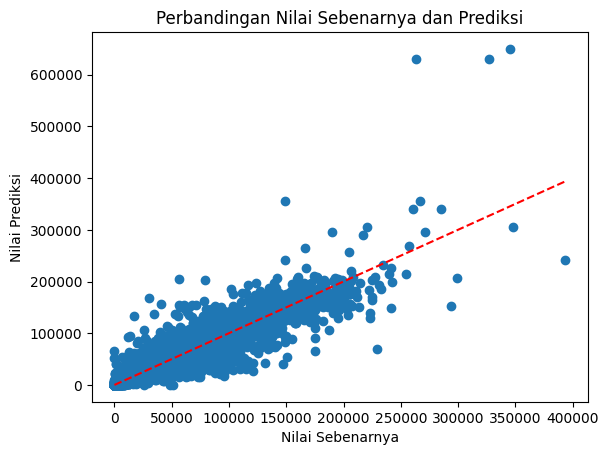

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_uji, y_pred1_uji)
plt.plot([min(y_uji), max(y_uji)], [min(y_uji), max(y_uji)], 'r--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi')
plt.show()

## Grafik menunjukkan perbandingan antara nilai sebenarnya dan hasil prediksi pada proses evaluasi model. Garis merah merepresentasikan garis ideal jika prediksi dan nilai sebenarnya bernilai sama. Sebaran titik memberikan gambaran seberapa jauh prediksi terhadap nilai sebenarnya.


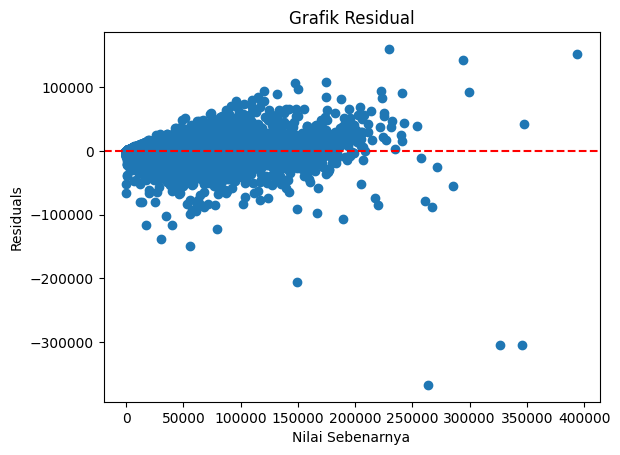

In [55]:
# Grafik residual
residuals = y_uji - y_pred1_uji
plt.scatter(y_uji, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.title('Grafik Residual')
plt.show()


## Grafik residual menunjukkan perbedaan antara nilai sebenarnya dan nilai prediksi. Titik-titik tersebar di sekitar garis nol, yang menandakan bahwa kesalahan model bervariasi tetapi masih menyebar secara acak.

# 1. EVALUASI MODEL MESIN LEARNING (DENGAN FEATURE SELECTION)

In [56]:
print(y_pred_uji[:5])  # Cek apakah variabel ini sudah ada dan memiliki nilai


[ 6453.86 17535.    2021.23 55704.13  6190.  ]


In [57]:
#membaca data yang telah dibersihkan
df_uji

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,2,44,5263.12,False,84.20,3.227,12355.50,295.05,100.15,6720.40,5506.53,221.521506,6.565,0,202307,27,7,2012
1,24,34,15102.00,False,64.30,2.837,0.00,0.00,0.00,0.00,0.00,132.761933,8.117,0,203819,38,9,2010
2,26,12,2844.68,False,16.70,3.215,0.00,0.00,0.00,0.00,0.00,132.951065,7.907,0,152513,2,1,2011
3,13,23,43395.78,False,36.78,2.817,0.00,0.00,0.00,0.00,0.00,126.793400,7.795,0,219622,49,12,2010
4,39,58,2880.00,True,66.36,3.236,224.08,292.94,77126.16,77.74,4875.43,217.181253,7.716,0,184109,47,11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125591,27,31,9074.32,False,70.31,2.885,0.00,0.00,0.00,0.00,0.00,136.557015,7.982,0,204184,34,8,2010
125592,39,72,40114.98,False,73.79,3.274,0.00,0.00,0.00,0.00,0.00,216.088526,7.716,0,184109,41,10,2011
125593,14,34,21377.88,False,45.52,3.848,15710.87,1050.48,1.49,2302.28,2702.96,190.335997,8.424,0,200898,10,3,2012
125594,15,98,53.25,False,30.53,3.351,0.00,0.00,0.00,0.00,0.00,132.882323,7.771,1,123737,1,1,2011


In [58]:
# cara menghapus fiture/input dengan korelasi terendah
df1 = df_uji.drop(['Temperature', 'Fuel_Price'],  axis=1)

df1

,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,2,44,5263.12,False,12355.50,295.05,100.15,6720.40,5506.53,221.521506,6.565,0,202307,27,7,2012
1,24,34,15102.00,False,0.00,0.00,0.00,0.00,0.00,132.761933,8.117,0,203819,38,9,2010
2,26,12,2844.68,False,0.00,0.00,0.00,0.00,0.00,132.951065,7.907,0,152513,2,1,2011
3,13,23,43395.78,False,0.00,0.00,0.00,0.00,0.00,126.793400,7.795,0,219622,49,12,2010
4,39,58,2880.00,True,224.08,292.94,77126.16,77.74,4875.43,217.181253,7.716,0,184109,47,11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125591,27,31,9074.32,False,0.00,0.00,0.00,0.00,0.00,136.557015,7.982,0,204184,34,8,2010
125592,39,72,40114.98,False,0.00,0.00,0.00,0.00,0.00,216.088526,7.716,0,184109,41,10,2011
125593,14,34,21377.88,False,15710.87,1050.48,1.49,2302.28,2702.96,190.335997,8.424,0,200898,10,3,2012
125594,15,98,53.25,False,0.00,0.00,0.00,0.00,0.00,132.882323,7.771,1,123737,1,1,2011


In [59]:
# Memisahkan fitur (X/input) dan target (y/output):
X_uji = df1.drop('Weekly_Sales', axis=1)
y_uji = df1['Weekly_Sales']

In [60]:
y_pred_uji = model1.predict(X_uji)

In [61]:
print(y_uji.shape, y_pred_uji.shape)

(125596,) (125596,)


In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error

# Menghitung Mean Squared Error (MSE)
MSE_Evaluasi = mean_squared_error(y_uji, y_pred_uji)
print('Mean Squared Error:', MSE_Evaluasi)

# Menghitung R-squared
R_Evaluasi = r2_score(y_uji, y_pred_uji)
print("R-squared:", R_Evaluasi)

# Menghitung Mean Absolute Error (MAE)
MAE_Evaluasi = mean_absolute_error(y_uji, y_pred_uji)
print("MAE:", MAE_Evaluasi)

rmse = np.sqrt(mean_squared_error(y_uji, y_pred_uji))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 24199224.614533953
R-squared: 0.9528732451998317
MAE: 1884.2028267366593
Root Mean Squared Error: 4919.270740113208


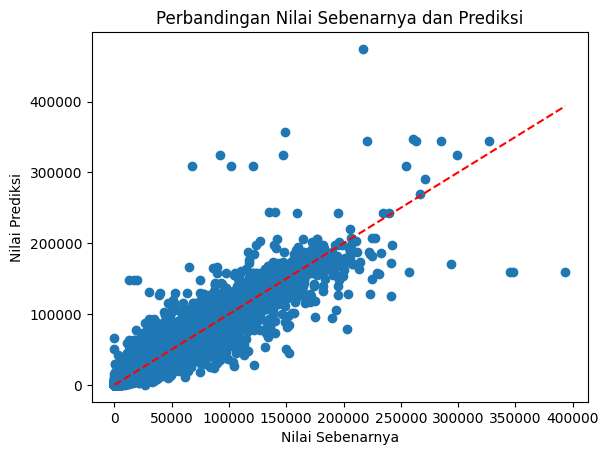

In [64]:
import matplotlib.pyplot as plt
plt.scatter(y_uji, y_pred_uji)
plt.plot([min(y_uji), max(y_uji)], [min(y_uji), max(y_uji)], 'r--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Prediksi')
plt.show()

## Gambar ini menyajikan visualisasi hasil evaluasi model setelah dilakukan feature selection pada data uji. Sumbu horizontal menunjukkan nilai sebenarnya, sedangkan sumbu vertikal menampilkan nilai prediksi model. Titik-titik biru merepresentasikan setiap sampel data uji, dan sebarannya di sekitar garis merah putus-putus (garis ideal) menggambarkan kinerja prediksi model. Secara visual, terlihat bahwa model cenderung memiliki akurasi yang lebih rendah dalam memprediksi nilai-nilai yang lebih tinggi, yang ditandai dengan dispersi titik-titik prediksi yang lebih besar dari garis ideal pada rentang nilai tersebut.

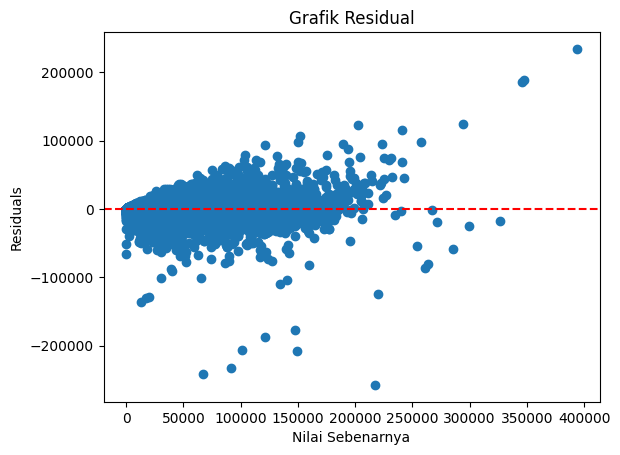

In [65]:
# Grafik residual
residuals = y_uji - y_pred_uji
plt.scatter(y_uji, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.title('Grafik Residual')
plt.show()

### Grafik Residual Setelah Feature Selection

### Grafik di atas menunjukkan hasil evaluasi model setelah feature selection. Sumbu X menunjukkan nilai sebenarnya, sedangkan sumbu Y menunjukkan selisih antara nilai prediksi dan nilai sebenarnya. Titik-titik yang menyebar dekat garis nol menunjukkan bahwa sebagian besar prediksi model sudah cukup mendekati nilai sebenarnya.